### We have the min and max temperatures in a city In India for each months of the year.We would like to find a function to describe this and show it graphically, the dataset given below.
#### Task:
1. fitting it to the periodic function
2. plot the fit
#### Data
#### Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
#### Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
Min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])
Months=np.arange(12)

Text(0, 0.5, 'Minimum and Maximum temperature')

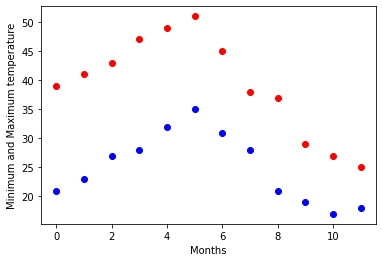

In [3]:
plt.plot(Months,Max,'ro')
plt.plot(Months,Min,'bo')
plt.xlabel("Months")
plt.ylabel("Minimum and Maximum temperature")

### 1.Fitting it to the periodic function

In [4]:
from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 1.8 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, Months,Max, [40, 20, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, Months,Min, [-40, 20, 0])

In [5]:
res_max,res_min

(array([ 39.10062829, -11.08724928,   2.10332481]),
 array([24.87112259, -7.8989966 ,  1.60673367]))

In [6]:
cov_max,cov_min

(array([[0.66228818, 0.01819673, 0.00307791],
        [0.01819673, 1.3255596 , 0.0045694 ],
        [0.00307791, 0.0045694 , 0.04074436]]),
 array([[0.20011361, 0.00665861, 0.00092116],
        [0.00665861, 0.40433319, 0.00165614],
        [0.00092116, 0.00165614, 0.02402399]]))

### 2. plot the fit

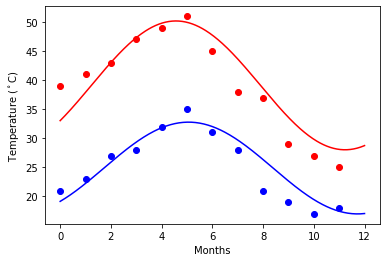

In [7]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(Months, Max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(Months,Min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Months')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()


### Q-2 This assignment is for visualization using matplotlib:data to use:
url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv
#### titanic = pd.read_csv(url)
##### Charts to plot:
1. Create a pie chart presenting the male/female proportion
2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [8]:
import pandas as pd
url='https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'

In [9]:
titanic=pd.read_csv(url)
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [10]:
titanic.shape

(1310, 14)

### 1. Create a pie chart presenting the male/female proportion.

In [11]:
titanic['sex']

0       female
1         male
2       female
3         male
4       female
         ...  
1305    female
1306      male
1307      male
1308      male
1309       NaN
Name: sex, Length: 1310, dtype: object

In [12]:
gender=titanic['sex'].astype('category')

In [13]:
gender=gender.cat.codes
gender

0       0
1       1
2       0
3       1
4       0
       ..
1305    0
1306    1
1307    1
1308    1
1309   -1
Length: 1310, dtype: int8

In [14]:
num_gender= gender.value_counts()
num_gender

 1    843
 0    466
-1      1
dtype: int64

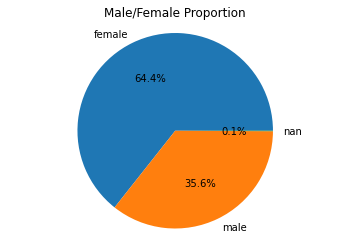

In [15]:
plt.pie(num_gender,labels=titanic['sex'].unique(),autopct='%1.1f%%')
plt.title('Male/Female Proportion')
plt.axis('equal')
plt.show()

### 2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender.

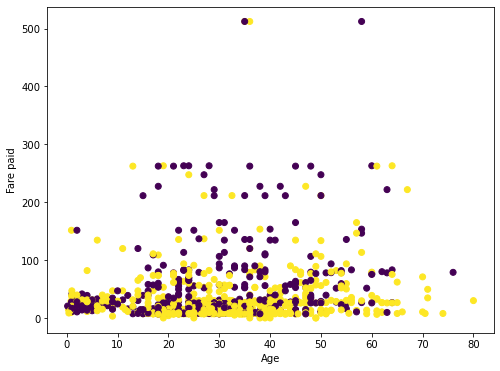

In [16]:
plt.figure(figsize=(8,6))
plt.scatter(titanic['age'],titanic['fare'],c=gender)
plt.xlabel("Age")
plt.ylabel("Fare paid")
plt.show()